t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets, e.g. Gene Expression Datasets. 

t-SNE measures the distance from each data-instance to every other instance, converted into a probability by fitting a normal distribution over the current case. These probabilities are scaled by dividing them by their sum, so that they add to 1 (a standard practice to convert an array of natural numbers to probabilities.)

<img src="./figs/t-sne-fig1.png" width="700">

This is done for each data instance.

When converting these distances in the lower-dimensional representation into probabilities, t-SNE fits a Student’s t distribution over the current data-instance instead of a normal distribution. The Student’s t distribution has longer tails, meaning dissimilar cases are pushed further away to achieve the same probability as in the high-dimensional representation. This allows a very strict neighbour (local) structure to prevail in the t-SNE embedding space.

<img src="./figs/t-sne-fig2.png" width="700">

The goal is then to force a match between the Gaussian distribution (in the original space) and the t-distribution (in the t-SNE embedding space). This is done minimising a loss function: The [Kullback-Leibler Divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). This is an iterative procedure and requires a parameter called "Maximum number of steps" ($n_{iter}$ in Scikit-Learn version of t-SNE).

There are some more hyperparameters, such as $perplexity$ value that roughly translates to the data density in the neighbourhood of a data-instance. I have discussed about this in our zoom discussion. Please go through it. In fact, you can see how this parameter affects the t-SNE performance through the experiments in this notebook.

In [1]:
#load all the required libraries
import time
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the gene-expression matrix
data_path = './data/TCGA-PANCAN-HiSeq-801x20531'

df_X = pd.read_csv(f'{data_path}/data.csv', delimiter=',')
print(df_X.shape)

df_y = pd.read_csv(f'{data_path}/labels.csv', delimiter=',')
print(df_y.shape)

(801, 20532)
(801, 2)


In [3]:
#Let's print a first few samples and their expressions for each gene
df_X.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
#and, to which classes these samples belong?
df_y.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
X = df_X.iloc[:,1:]
y = df_y.iloc[:,1:]

Notice that each sample is represented by a `df_X.shape[1]` vector (e.g. 20531-length real valued vector; or we can say $\mathbf{x} \in \mathbb{R}^{20531}$). So the total matrix is represented by $\mathbf{X} \in \mathbb{R}^{801 \times 20531}$, that is there are 801 instances (samples), each represented by a gene expression vector of length 20531.

In [6]:
#Ok, how many classes are there and for each class, how many samples are present?
print(y.value_counts())
num_classes = np.unique(list(y.values))
print(f'\nDistinct classes: {num_classes}')

Class
BRCA     300
KIRC     146
LUAD     141
PRAD     136
COAD      78
dtype: int64

Distinct classes: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


We are interested in represent each sample in a lower-dimensional space (human visualisable: 2-dimension). We will use the t-Stochastic Neighbour Embedding (t-SNE) to do this job for us. See the associated notebook/slides/notes in this repository.


In [7]:
#t-SNE and see how much time it takes
time_start = time.time()

tsne = TSNE(n_components=2,
            init='random',
            verbose=2, 
            perplexity=30, 
            n_iter=1000,
            learning_rate='auto',
            random_state=0)

tsne_results = tsne.fit_transform(X)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds.')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.053s...
[t-SNE] Computed neighbors for 801 samples in 0.341s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 51.650639
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 58.3380280, gradient norm = 0.1760245 (50 iterations in 0.061s)
[t-SNE] Iteration 100: error = 51.5765572, gradient norm = 0.0750653 (50 iterations in 0.052s)
[t-SNE] Iteration 150: error = 50.7253113, gradient norm = 0.0217854 (50 iterations in 0.111s)
[t-SNE] Iteration 200: error = 50.3455353, gradient norm = 0.0142780 (50 iterations in 0.068s)
[t-SNE] Iteration 250: error = 50.1348076, gradient norm = 0.0313311 (50 iterations in 0.066s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.134808
[t-SNE] Iteration 300: error = 0.9229858, gradient norm = 0.0019647 (50 iterations in 0.056s)
[t-SNE] Iteration 350: error = 0.7898197, gradient norm = 0.0006245 

In [8]:
y

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


<AxesSubplot: xlabel='var1', ylabel='var2'>

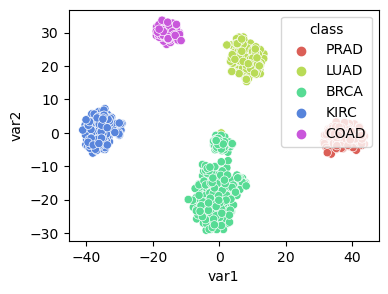

In [9]:
#visualise the result in low-dimension (2-dim)
tsne_embedding = pd.DataFrame()
tsne_embedding['var1'] = tsne_results[:,0]
tsne_embedding['var2'] = tsne_results[:,1]
tsne_embedding['class'] = y['Class'].values

plt.figure(figsize=(4,3))
sns.scatterplot(
    x="var1", y="var2",
    hue="class",
    palette=sns.color_palette("hls", len(num_classes)),
    data=tsne_embedding,
    legend="full",
    alpha=1
)

One would agree that the standard Euclidean distance in such a high-dimensional space ($\mathbb{R}^{48106}$) doesn't work well (see Wiki page on [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)). So, to make things meaningful, let's try reducing the dimension to a lower dimension first, using [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) and then learn t-SNE on the reduced dimension. See below:

In [10]:
#t-SNE and see how much time it takes
time_start = time.time()

tsne = TSNE(n_components=2,
            init='pca',
            verbose=2, 
            perplexity=30, 
            n_iter=1000,
            learning_rate='auto',
            random_state=0)

tsne_results = tsne.fit_transform(X)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds.')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.084s...
[t-SNE] Computed neighbors for 801 samples in 0.330s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 51.650639
[t-SNE] Computed conditional probabilities in 0.020s


/home/dash/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 55.3274536, gradient norm = 0.1681842 (50 iterations in 0.102s)
[t-SNE] Iteration 100: error = 50.6188698, gradient norm = 0.0619562 (50 iterations in 0.051s)
[t-SNE] Iteration 150: error = 49.4949684, gradient norm = 0.1021365 (50 iterations in 0.060s)
[t-SNE] Iteration 200: error = 48.9416084, gradient norm = 0.0396136 (50 iterations in 0.054s)
[t-SNE] Iteration 250: error = 48.9202690, gradient norm = 0.0417593 (50 iterations in 0.063s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.920269
[t-SNE] Iteration 300: error = 0.7693412, gradient norm = 0.0016825 (50 iterations in 0.048s)
[t-SNE] Iteration 350: error = 0.7367803, gradient norm = 0.0004596 (50 iterations in 0.047s)
[t-SNE] Iteration 400: error = 0.7296184, gradient norm = 0.0002341 (50 iterations in 0.047s)
[t-SNE] Iteration 450: error = 0.7196873, gradient norm = 0.0003281 (50 iterations in 0.046s)
[t-SNE] Iteration 500: error = 0.7120135, gradient norm = 0.0001596 (50 

<AxesSubplot: xlabel='var1', ylabel='var2'>

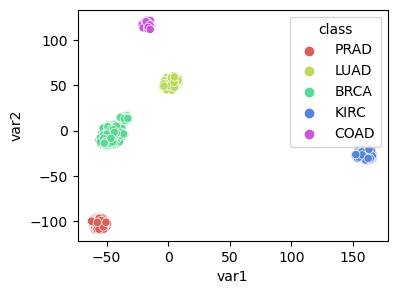

In [11]:
#visualise the result in low-dimension (2-dim)
tsne_embedding = pd.DataFrame()
tsne_embedding['var1'] = tsne_results[:,0]
tsne_embedding['var2'] = tsne_results[:,1]
tsne_embedding['class'] = y['Class'].values

plt.figure(figsize=(4,3))
sns.scatterplot(
    x="var1", y="var2",
    hue="class",
    palette=sns.color_palette("hls", len(num_classes)),
    data=tsne_embedding,
    legend="full",
    alpha=1
)

There is some difference to the earlier results.

**Questions:**

1. Study the effects of different hyperparameters in t-SNE.
2. Do you observe any difference in your visualisation if you change the `init` parameter within t-SNE? 
3. Look at [this page](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to study other hyperparameters.